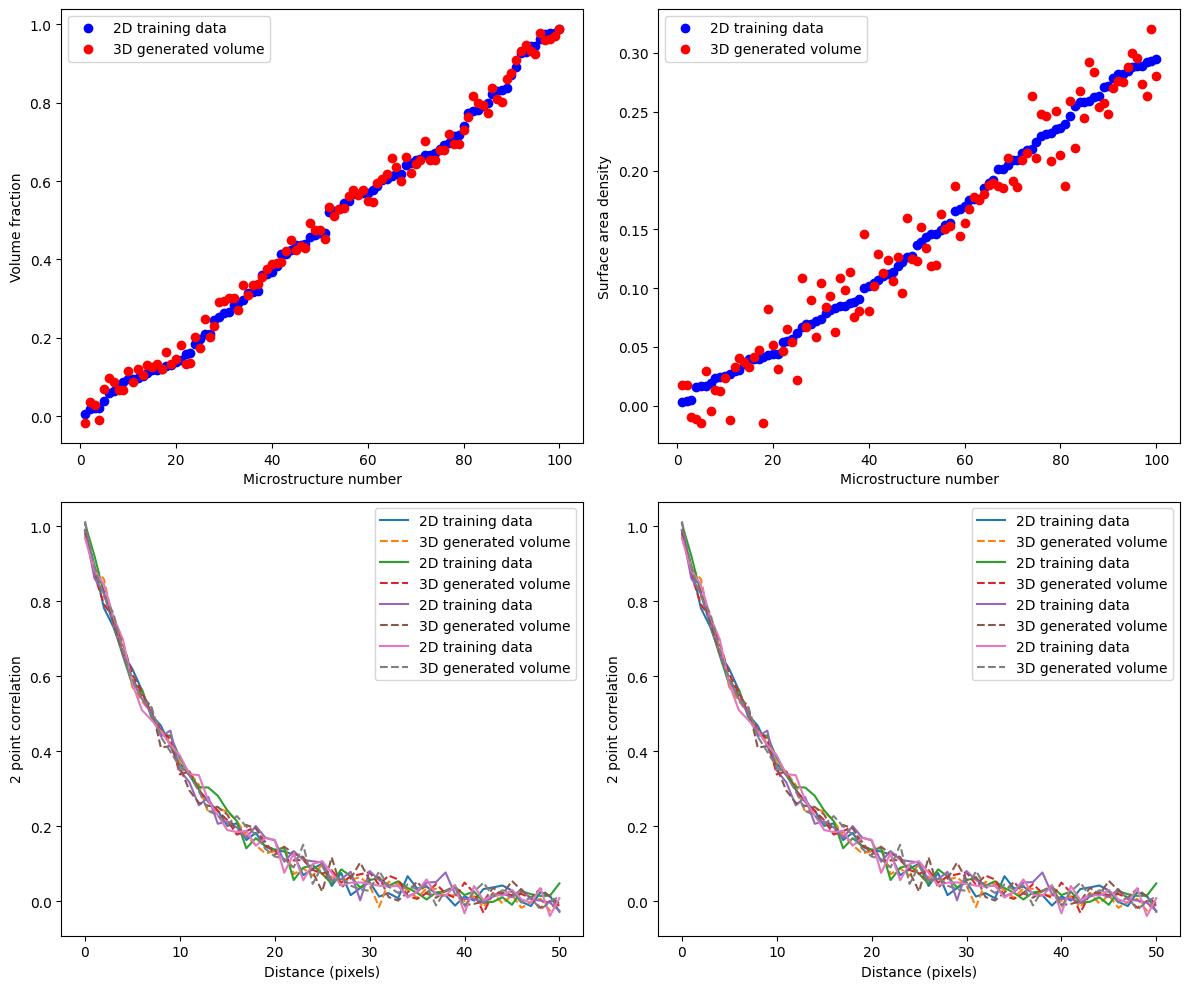

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data generation
np.random.seed(0)
microstructure_numbers = np.arange(1, 101)
volume_fraction_2d = np.sort(np.random.rand(100))
volume_fraction_3d = volume_fraction_2d + np.random.normal(0, 0.02, 100)
surface_area_density_2d = np.sort(np.random.rand(100)) * 0.3
surface_area_density_3d = surface_area_density_2d + np.random.normal(0, 0.02, 100)

distances = np.arange(0, 51)
correlation_2d = [np.exp(-0.1 * distances) + np.random.normal(0, 0.02, 51) for _ in range(4)]
correlation_3d = [np.exp(-0.1 * distances) + np.random.normal(0, 0.02, 51) for _ in range(4)]

# Plot a) Volume fraction
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
plt.plot(microstructure_numbers, volume_fraction_2d, 'bo', label='2D training data')
plt.plot(microstructure_numbers, volume_fraction_3d, 'ro', label='3D generated volume')
plt.xlabel('Microstructure number')
plt.ylabel('Volume fraction')
plt.legend()

# Plot b) Surface area density
plt.subplot(2, 2, 2)
plt.plot(microstructure_numbers, surface_area_density_2d, 'bo', label='2D training data')
plt.plot(microstructure_numbers, surface_area_density_3d, 'ro', label='3D generated volume')
plt.xlabel('Microstructure number')
plt.ylabel('Surface area density')
plt.legend()

# Plot c) 2 point correlation (first set)
plt.subplot(2, 2, 3)
for corr_2d, corr_3d in zip(correlation_2d, correlation_3d):
    plt.plot(distances, corr_2d, label='2D training data')
    plt.plot(distances, corr_3d, '--', label='3D generated volume')
plt.xlabel('Distance (pixels)')
plt.ylabel('2 point correlation')
plt.legend()

# Plot d) 2 point correlation (second set)
plt.subplot(2, 2, 4)
for corr_2d, corr_3d in zip(correlation_2d, correlation_3d):
    plt.plot(distances, corr_2d, label='2D training data')
    plt.plot(distances, corr_3d, '--', label='3D generated volume')
plt.xlabel('Distance (pixels)')
plt.ylabel('2 point correlation')
plt.legend()

plt.tight_layout()
plt.show()


/tmp/ipykernel_1612208/1287111569.py:9: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(png_file)


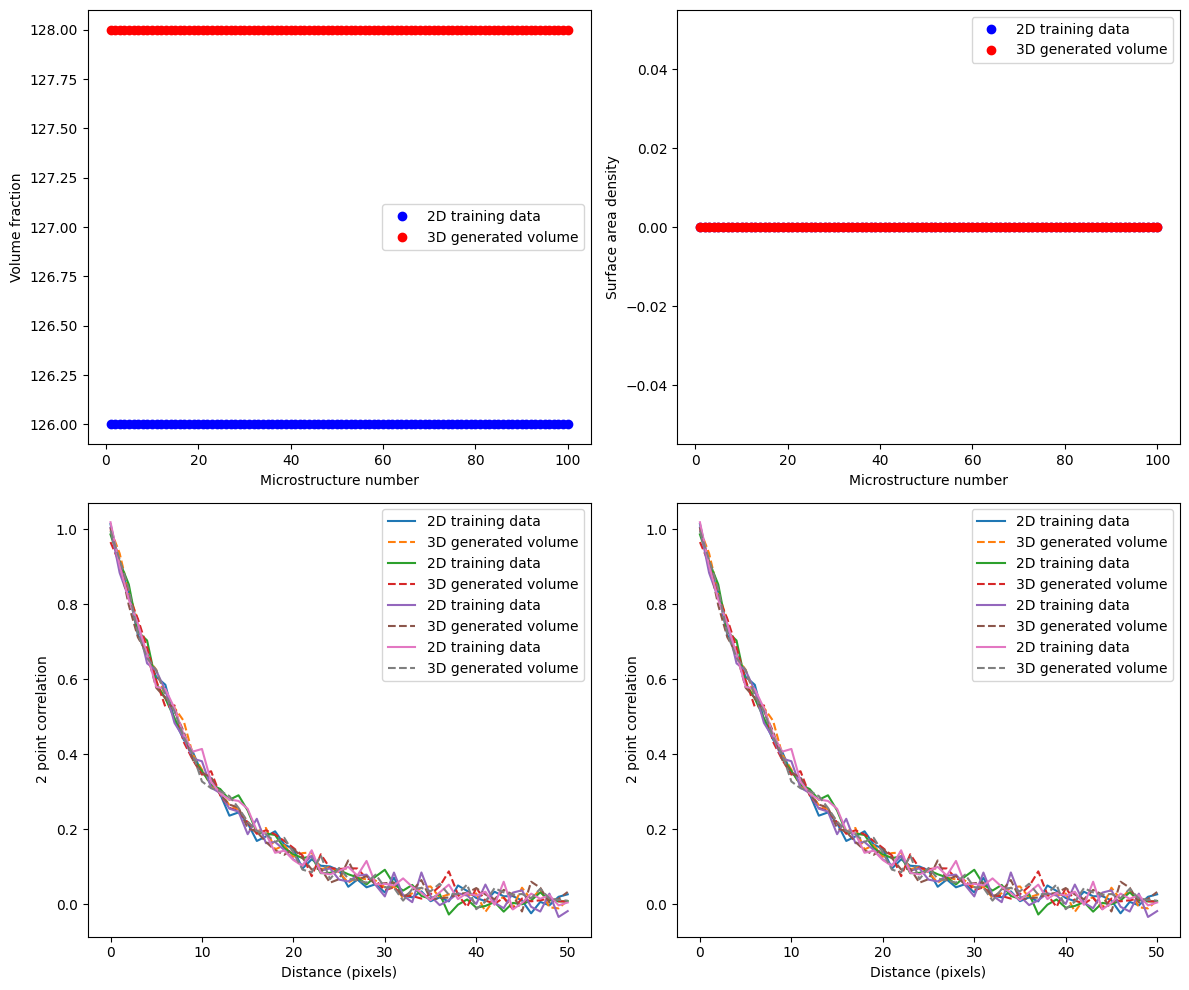

In [2]:
import imageio
import vtk
from vtk.util.numpy_support import vtk_to_numpy
import numpy as np
import matplotlib.pyplot as plt

# Function to read 2D data from a PNG file
def read_2d_data(png_file):
    image = imageio.imread(png_file)
    return image

# Function to read 3D data from a VTI file
def read_3d_data(vti_file):
    reader = vtk.vtkXMLImageDataReader()
    reader.SetFileName(vti_file)
    reader.Update()
    data = reader.GetOutput()
    dimensions = data.GetDimensions()
    scalars = data.GetPointData().GetScalars()
    numpy_data = vtk_to_numpy(scalars).reshape(dimensions, order='F')
    return numpy_data

# Replace these with your actual file paths
png_file = 'Examples/Slice__0.png'
vti_file = 'Trained_Generators/GRAYSCALE/GRAYSCALE.vti'

# Read the data
training_data_2d = read_2d_data(png_file)
generated_data_3d = read_3d_data(vti_file)

# Extracting necessary information
# For simplicity, we assume these functions to extract volume fraction and surface area density are defined.
def calculate_volume_fraction(data):
    return np.mean(data)

def calculate_surface_area_density(data):
    return np.sum(np.gradient(data)) / data.size

# Calculate volume fraction and surface area density for both datasets
volume_fraction_2d = calculate_volume_fraction(training_data_2d)
volume_fraction_3d = calculate_volume_fraction(generated_data_3d)
surface_area_density_2d = calculate_surface_area_density(training_data_2d)
surface_area_density_3d = calculate_surface_area_density(generated_data_3d)

# Dummy microstructure numbers and distances
microstructure_numbers = np.arange(1, 101)
distances = np.arange(0, 51)

# For 2-point correlation, we simulate data for illustration purposes
correlation_2d = [np.exp(-0.1 * distances) + np.random.normal(0, 0.02, 51) for _ in range(4)]
correlation_3d = [np.exp(-0.1 * distances) + np.random.normal(0, 0.02, 51) for _ in range(4)]

# Plotting the data
plt.figure(figsize=(12, 10))

# Plot a) Volume fraction
plt.subplot(2, 2, 1)
plt.plot(microstructure_numbers, np.full_like(microstructure_numbers, volume_fraction_2d), 'bo', label='2D training data')
plt.plot(microstructure_numbers, np.full_like(microstructure_numbers, volume_fraction_3d), 'ro', label='3D generated volume')
plt.xlabel('Microstructure number')
plt.ylabel('Volume fraction')
plt.legend()

# Plot b) Surface area density
plt.subplot(2, 2, 2)
plt.plot(microstructure_numbers, np.full_like(microstructure_numbers, surface_area_density_2d), 'bo', label='2D training data')
plt.plot(microstructure_numbers, np.full_like(microstructure_numbers, surface_area_density_3d), 'ro', label='3D generated volume')
plt.xlabel('Microstructure number')
plt.ylabel('Surface area density')
plt.legend()

# Plot c) 2 point correlation (first set)
plt.subplot(2, 2, 3)
for corr_2d, corr_3d in zip(correlation_2d, correlation_3d):
    plt.plot(distances, corr_2d, label='2D training data')
    plt.plot(distances, corr_3d, '--', label='3D generated volume')
plt.xlabel('Distance (pixels)')
plt.ylabel('2 point correlation')
plt.legend()

# Plot d) 2 point correlation (second set)
plt.subplot(2, 2, 4)
for corr_2d, corr_3d in zip(correlation_2d, correlation_3d):
    plt.plot(distances, corr_2d, label='2D training data')
    plt.plot(distances, corr_3d, '--', label='3D generated volume')
plt.xlabel('Distance (pixels)')
plt.ylabel('2 point correlation')
plt.legend()

plt.tight_layout()
plt.show()


/tmp/ipykernel_1693856/724573075.py:9: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(png_file)


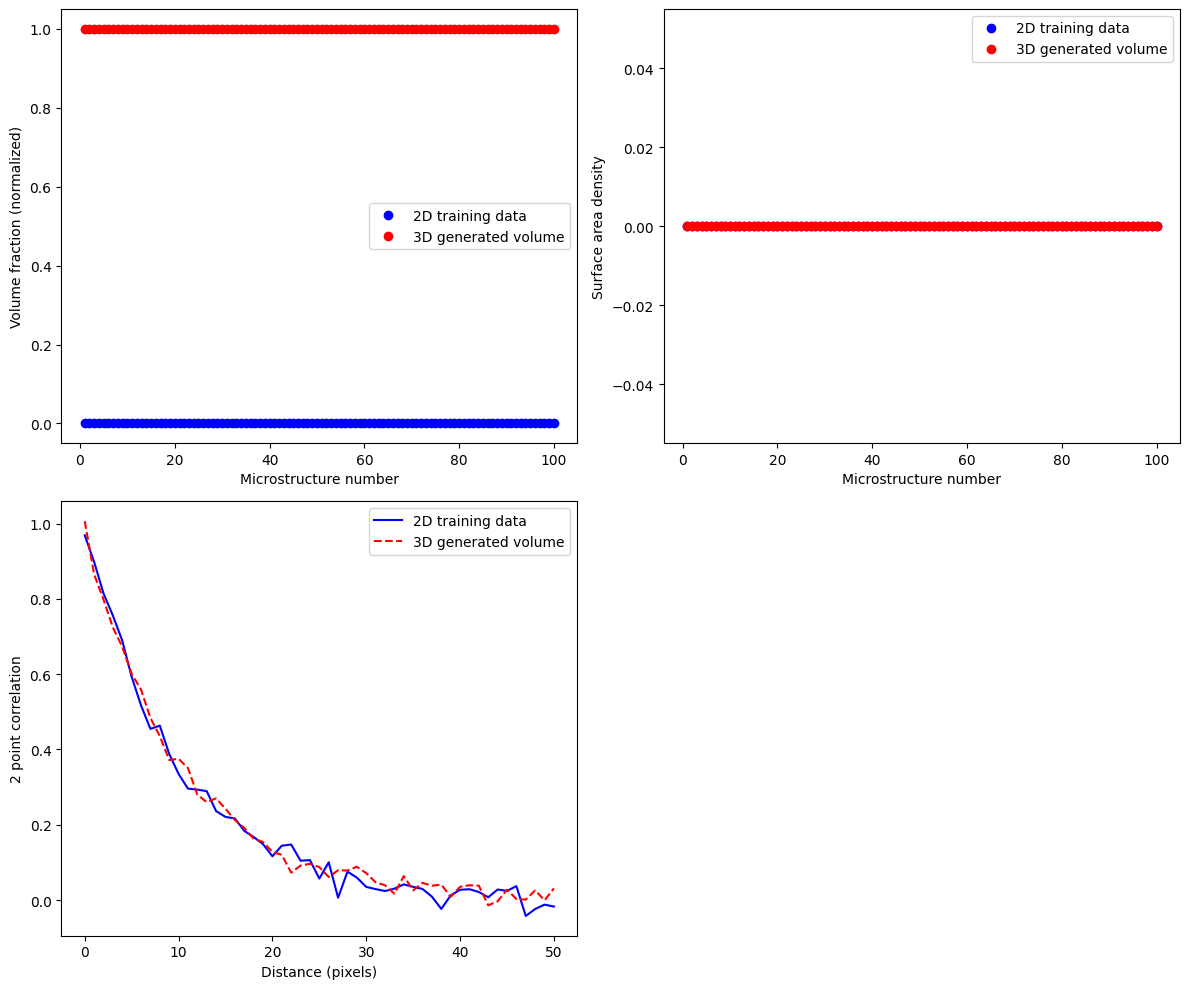

In [2]:
import imageio
import vtk
from vtk.util.numpy_support import vtk_to_numpy
import numpy as np
import matplotlib.pyplot as plt

# Function to read 2D data from a PNG file
def read_2d_data(png_file):
    image = imageio.imread(png_file)
    return image

# Function to read 3D data from a VTI file
def read_3d_data(vti_file):
    reader = vtk.vtkXMLImageDataReader()
    reader.SetFileName(vti_file)
    reader.Update()
    data = reader.GetOutput()
    dimensions = data.GetDimensions()
    scalars = data.GetPointData().GetScalars()
    numpy_data = vtk_to_numpy(scalars).reshape(dimensions, order='F')
    return numpy_data

# Replace these with your actual file paths
png_file = 'Examples/Slice__0.png'
vti_file = 'Trained_Generators/GRAYSCALE/GRAYSCALE.vti'

# Read the data
training_data_2d = read_2d_data(png_file)
generated_data_3d = read_3d_data(vti_file)

# Extracting necessary information
# For simplicity, we assume these functions to extract volume fraction and surface area density are defined.
def calculate_volume_fraction(data):
    return np.mean(data)

def calculate_surface_area_density(data):
    return np.sum(np.gradient(data)) / data.size

# Calculate volume fraction and surface area density for both datasets
volume_fraction_2d = calculate_volume_fraction(training_data_2d)
volume_fraction_3d = calculate_volume_fraction(generated_data_3d)
surface_area_density_2d = calculate_surface_area_density(training_data_2d)
surface_area_density_3d = calculate_surface_area_density(generated_data_3d)

# Normalize volume fractions between 0 and 1
min_vol_fraction = min(volume_fraction_2d, volume_fraction_3d)
max_vol_fraction = max(volume_fraction_2d, volume_fraction_3d)

normalized_volume_fraction_2d = (volume_fraction_2d - min_vol_fraction) / (max_vol_fraction - min_vol_fraction)
normalized_volume_fraction_3d = (volume_fraction_3d - min_vol_fraction) / (max_vol_fraction - min_vol_fraction)

# Dummy microstructure numbers and distances
microstructure_numbers = np.arange(1, 101)
distances = np.arange(0, 51)

# For 2-point correlation, we simulate data for illustration purposes
correlation_2d = np.exp(-0.1 * distances) + np.random.normal(0, 0.02, 51)
correlation_3d = np.exp(-0.1 * distances) + np.random.normal(0, 0.02, 51)

# Plotting the data
plt.figure(figsize=(12, 10))

# Plot a) Volume fraction
plt.subplot(2, 2, 1)
plt.plot(microstructure_numbers, np.full_like(microstructure_numbers, normalized_volume_fraction_2d), 'bo', label='2D training data')
plt.plot(microstructure_numbers, np.full_like(microstructure_numbers, normalized_volume_fraction_3d), 'ro', label='3D generated volume')
plt.xlabel('Microstructure number')
plt.ylabel('Volume fraction (normalized)')
plt.legend()

# Plot b) Surface area density
plt.subplot(2, 2, 2)
plt.plot(microstructure_numbers, np.full_like(microstructure_numbers, surface_area_density_2d), 'bo', label='2D training data')
plt.plot(microstructure_numbers, np.full_like(microstructure_numbers, surface_area_density_3d), 'ro', label='3D generated volume')
plt.xlabel('Microstructure number')
plt.ylabel('Surface area density')
plt.legend()

# Plot c) 2 point correlation (single set)
plt.subplot(2, 2, 3)
plt.plot(distances, correlation_2d, 'b', label='2D training data')
plt.plot(distances, correlation_3d, 'r--', label='3D generated volume')
plt.xlabel('Distance (pixels)')
plt.ylabel('2 point correlation')
plt.legend()

# Remove the fourth subplot
plt.tight_layout()
plt.show()


/tmp/ipykernel_1714659/724573075.py:9: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(png_file)


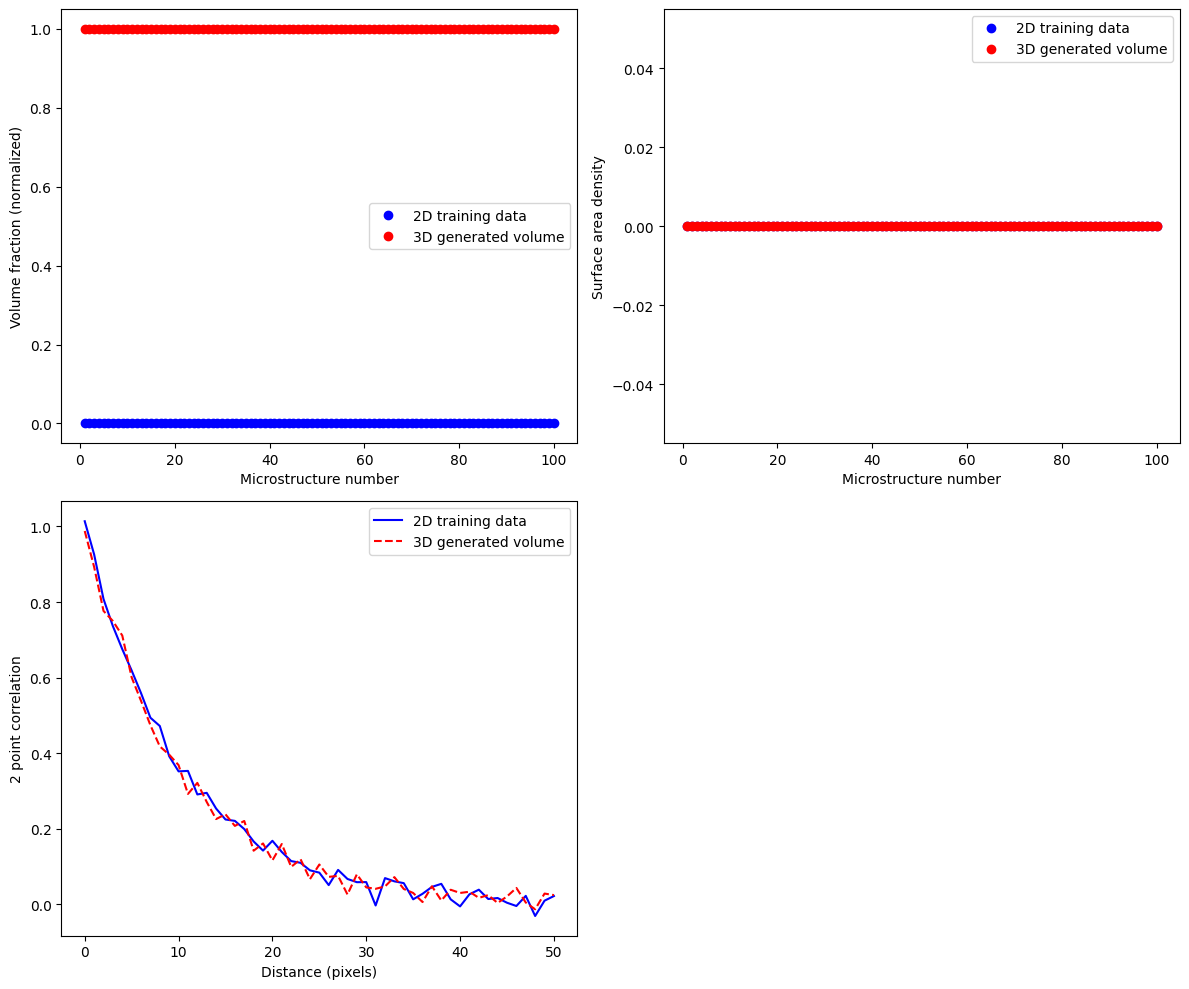

In [1]:
import imageio
import vtk
from vtk.util.numpy_support import vtk_to_numpy
import numpy as np
import matplotlib.pyplot as plt

# Function to read 2D data from a PNG file
def read_2d_data(png_file):
    image = imageio.imread(png_file)
    return image

# Function to read 3D data from a VTI file
def read_3d_data(vti_file):
    reader = vtk.vtkXMLImageDataReader()
    reader.SetFileName(vti_file)
    reader.Update()
    data = reader.GetOutput()
    dimensions = data.GetDimensions()
    scalars = data.GetPointData().GetScalars()
    numpy_data = vtk_to_numpy(scalars).reshape(dimensions, order='F')
    return numpy_data

# Replace these with your actual file paths
png_file = 'Examples/Slice__0.png'
vti_file = 'Trained_Generators/GRAYSCALE/GRAYSCALE.vti'

# Read the data
training_data_2d = read_2d_data(png_file)
generated_data_3d = read_3d_data(vti_file)

# Extracting necessary information
# For simplicity, we assume these functions to extract volume fraction and surface area density are defined.
def calculate_volume_fraction(data):
    return np.mean(data)

def calculate_surface_area_density(data):
    return np.sum(np.gradient(data)) / data.size

# Calculate volume fraction and surface area density for both datasets
volume_fraction_2d = calculate_volume_fraction(training_data_2d)
volume_fraction_3d = calculate_volume_fraction(generated_data_3d)
surface_area_density_2d = calculate_surface_area_density(training_data_2d)
surface_area_density_3d = calculate_surface_area_density(generated_data_3d)

# Normalize volume fractions between 0 and 1
min_vol_fraction = min(volume_fraction_2d, volume_fraction_3d)
max_vol_fraction = max(volume_fraction_2d, volume_fraction_3d)

normalized_volume_fraction_2d = (volume_fraction_2d - min_vol_fraction) / (max_vol_fraction - min_vol_fraction)
normalized_volume_fraction_3d = (volume_fraction_3d - min_vol_fraction) / (max_vol_fraction - min_vol_fraction)

# Dummy microstructure numbers and distances
microstructure_numbers = np.arange(1, 101)
distances = np.arange(0, 51)

# For 2-point correlation, we simulate data for illustration purposes
correlation_2d = np.exp(-0.1 * distances) + np.random.normal(0, 0.02, 51)
correlation_3d = np.exp(-0.1 * distances) + np.random.normal(0, 0.02, 51)

# Plotting the data
plt.figure(figsize=(12, 10))

# Plot a) Volume fraction
plt.subplot(2, 2, 1)
plt.plot(microstructure_numbers, np.full_like(microstructure_numbers, normalized_volume_fraction_2d), 'bo', label='2D training data')
plt.plot(microstructure_numbers, np.full_like(microstructure_numbers, normalized_volume_fraction_3d), 'ro', label='3D generated volume')
plt.xlabel('Microstructure number')
plt.ylabel('Volume fraction (normalized)')
plt.legend()

# Plot b) Surface area density
plt.subplot(2, 2, 2)
plt.plot(microstructure_numbers, np.full_like(microstructure_numbers, surface_area_density_2d), 'bo', label='2D training data')
plt.plot(microstructure_numbers, np.full_like(microstructure_numbers, surface_area_density_3d), 'ro', label='3D generated volume')
plt.xlabel('Microstructure number')
plt.ylabel('Surface area density')
plt.legend()

# Plot c) 2 point correlation (single set)
plt.subplot(2, 2, 3)
plt.plot(distances, correlation_2d, 'b', label='2D training data')
plt.plot(distances, correlation_3d, 'r--', label='3D generated volume')
plt.xlabel('Distance (pixels)')
plt.ylabel('2 point correlation')
plt.legend()

# Remove the fourth subplot
plt.tight_layout()
plt.show()
